In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

In [198]:
df_dolar = pd.read_csv('../data/usd_brl_data.csv', sep=',', decimal=',')
df_petroleo = pd.read_csv('../data/word_oil_prices.csv', sep=',')
df_combustiveis = pd.read_csv('../data/br_oil_prices_formatado.csv', sep=';')

#### Inicialmente, fazendo ajustes no DataFrame dos combustíveis

In [199]:
df_combustiveis

,DATA INICIAL,DATA FINAL,REGIAO,ESTADO,PRODUTO,NUMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MEDIO REVENDA,DESVIO PADRAO REVENDA,PRECO MINIMO REVENDA,PRECO MAXIMO REVENDA,MARGEM MEDIA REVENDA,COEF VARIACAO REVENDA,PRECO MEDIO DISTRIBUICAO,DESVIO PADRAO DISTRIBUICAO,PRECO MINIMO DISTRIBUICAO,PRECO MAXIMO DISTRIBUICAO,COEF DE VARIACAO DISTRIBUICAO
0,2004-05-09,2004-05-15,CENTRO OESTE,DF,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GO,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MT,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MS,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,AL,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82788,2021-04-25,2021-05-01,NORTE,RR,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.000,0.012,-99999.000,-99999.000,-99999.0000,-99999.00000,-99999.000
82789,2021-04-25,2021-05-01,SUL,SC,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.000,0.045,-99999.000,-99999.000,-99999.0000,-99999.00000,-99999.000
82790,2021-04-25,2021-05-01,SUDESTE,SP,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.000,0.051,-99999.000,-99999.000,-99999.0000,-99999.00000,-99999.000
82791,2021-04-25,2021-05-01,NORDESTE,SE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.000,0.046,-99999.000,-99999.000,-99999.0000,-99999.00000,-99999.000


In [200]:
df_combustiveis = df_combustiveis[['DATA INICIAL', 'ESTADO', 'PRODUTO', 'PRECO MEDIO REVENDA']].copy()
df_combustiveis.sample(5)

,DATA INICIAL,ESTADO,PRODUTO,PRECO MEDIO REVENDA
45612,2014-08-31,AM,OLEO DIESEL,2.596
25085,2005-01-09,PB,OLEO DIESEL,1.639
24186,2004-05-23,DF,OLEO DIESEL,1.444
40347,2013-09-22,AP,OLEO DIESEL S10,2.806
62968,2017-10-08,MS,OLEO DIESEL,3.435


In [201]:
df_combustiveis = df_combustiveis[(df_combustiveis['ESTADO']=='PR') & (df_combustiveis['PRODUTO']=='GASOLINA COMUM')]
df_combustiveis.sample(5)

,DATA INICIAL,ESTADO,PRODUTO,PRECO MEDIO REVENDA
12250,2004-06-20,PR,GASOLINA COMUM,2.123
51507,2015-09-20,PR,GASOLINA COMUM,3.252
14166,2005-11-13,PR,GASOLINA COMUM,2.457
64423,2018-01-07,PR,GASOLINA COMUM,4.125
39847,2013-08-18,PR,GASOLINA COMUM,2.788


In [202]:
df_combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 12088 to 82727
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATA INICIAL         873 non-null    object 
 1   ESTADO               873 non-null    object 
 2   PRODUTO              873 non-null    object 
 3   PRECO MEDIO REVENDA  873 non-null    float64
dtypes: float64(1), object(3)
memory usage: 34.1+ KB


In [203]:
df_combustiveis.rename({'DATA INICIAL': 'DATA', 'PRECO MEDIO REVENDA': 'PRECO GASOLINA'}, axis=1, inplace=True)
df_combustiveis.drop(['ESTADO', 'PRODUTO'], axis=1, inplace=True)

In [204]:
df_combustiveis['DATA'] = pd.to_datetime(df_combustiveis['DATA'], format='%Y-%m-%d')
df_combustiveis

,DATA,PRECO GASOLINA
12088,2004-05-09,1.966
12115,2004-05-16,1.961
12142,2004-05-23,1.963
12169,2004-05-30,1.993
12196,2004-06-06,2.001
...,...,...
82188,2021-03-28,5.227
82323,2021-04-04,5.161
82458,2021-04-11,5.176
82592,2021-04-18,5.225


In [205]:
df_combustiveis['DATA'].max()

Timestamp('2021-04-25 00:00:00')

In [206]:
df_combustiveis['DATA'].min()

Timestamp('2004-05-09 00:00:00')

Baseado no código acima podemos perceber que nosso range de datas é desde 09/05/2004 até 25/04/2021 e que todas as medições são representadas no domingo.

#### Ajustes no DataFrame do dólar

In [207]:
df_dolar

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,19 de ago. de 2022,5.1695,5.1685,5.2192,5.1648,"132,82K","0,04%"
1,18 de ago. de 2022,5.1674,5.1655,5.2074,5.1283,"149,11K","0,06%"
2,17 de ago. de 2022,5.1642,5.1469,5.2144,5.1452,"167,02K","0,36%"
3,16 de ago. de 2022,5.1459,5.0987,5.1549,5.0965,"148,45K","0,98%"
4,15 de ago. de 2022,5.0961,5.0721,5.1409,5.0721,"130,15K","0,45%"
...,...,...,...,...,...,...,...
4836,05 de fev. de 2004,2.9310,2.9285,2.9430,2.9250,NaN,"0,41%"
4837,04 de fev. de 2004,2.9190,2.9210,2.9200,2.9010,NaN,"0,07%"
4838,03 de fev. de 2004,2.9170,2.9305,2.9390,2.9140,NaN,"-0,85%"
4839,02 de fev. de 2004,2.9420,2.9270,2.9570,2.9380,NaN,"0,26%"


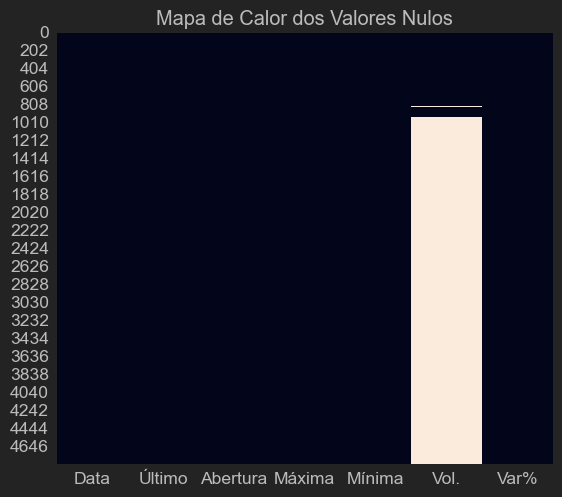

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4841 non-null   object 
 1   Último    4841 non-null   float64
 2   Abertura  4841 non-null   float64
 3   Máxima    4841 non-null   float64
 4   Mínima    4841 non-null   float64
 5   Vol.      922 non-null    object 
 6   Var%      4841 non-null   object 
dtypes: float64(4), object(3)
memory usage: 264.9+ KB


In [208]:
sns.heatmap(df_dolar.isnull(), cbar=False)
plt.title('Mapa de Calor dos Valores Nulos')
plt.show()
df_dolar.info()

In [209]:
df_dolar.drop(['Abertura', 'Último', 'Vol.', 'Var%'], axis=1, inplace=True, errors='ignore')
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    4841 non-null   object 
 1   Máxima  4841 non-null   float64
 2   Mínima  4841 non-null   float64
dtypes: float64(2), object(1)
memory usage: 113.6+ KB


In [210]:
df_dolar['Data'] = df_dolar['Data'].str.replace(' de jan. de ','/01/', regex=True)
df_dolar['Data'] = df_dolar['Data'].str.replace(' de fev. de ','/02/', regex=True)
df_dolar['Data'] = df_dolar['Data'].str.replace(' de mar. de ','/03/', regex=True)
df_dolar['Data'] = df_dolar['Data'].str.replace(' de abr. de ','/04/', regex=True)
df_dolar['Data'] = df_dolar['Data'].str.replace(' de mai. de ','/05/', regex=True)
df_dolar['Data'] = df_dolar['Data'].str.replace(' de jun. de ','/06/', regex=True)
df_dolar['Data'] = df_dolar['Data'].str.replace(' de jul. de ','/07/', regex=True)
df_dolar['Data'] = df_dolar['Data'].str.replace(' de ago. de ','/08/', regex=True)
df_dolar['Data'] = df_dolar['Data'].str.replace(' de set. de ','/09/', regex=True)
df_dolar['Data'] = df_dolar['Data'].str.replace(' de out. de ','/10/', regex=True)
df_dolar['Data'] = df_dolar['Data'].str.replace(' de nov. de ','/11/', regex=True)
df_dolar['Data'] = df_dolar['Data'].str.replace(' de dez. de ','/12/', regex=True)
df_dolar

,Data,Máxima,Mínima
0,19/08/2022,5.2192,5.1648
1,18/08/2022,5.2074,5.1283
2,17/08/2022,5.2144,5.1452
3,16/08/2022,5.1549,5.0965
4,15/08/2022,5.1409,5.0721
...,...,...,...
4836,05/02/2004,2.9430,2.9250
4837,04/02/2004,2.9200,2.9010
4838,03/02/2004,2.9390,2.9140
4839,02/02/2004,2.9570,2.9380


In [211]:
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    4841 non-null   object 
 1   Máxima  4841 non-null   float64
 2   Mínima  4841 non-null   float64
dtypes: float64(2), object(1)
memory usage: 113.6+ KB


In [212]:
df_dolar['Data'] = df_dolar['Data'].astype('datetime64[ns]')
df_dolar.info()
df_dolar.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    4841 non-null   datetime64[ns]
 1   Máxima  4841 non-null   float64       
 2   Mínima  4841 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 113.6 KB


C:\Users\bruno\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '19/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\bruno\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '18/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\bruno\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '17/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\bruno\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '16/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\bruno\anaconda3\lib\site-packages\pandas\core\d

,Data,Máxima,Mínima
472,2020-10-28,5.7927,5.7017
276,2021-07-29,5.1165,5.0406
1159,2018-12-03,3.2684,3.2500
4577,2005-02-02,2.6345,2.5995
2302,2013-10-23,2.1909,2.1717


In [213]:
df_dolar['MEDIA'] = (df_dolar['Máxima'] + df_dolar['Mínima'])/2
df_dolar.drop(['Máxima', 'Mínima'], axis=1, inplace=True, errors='ignore')
df_dolar

,Data,MEDIA
0,2022-08-19,5.19200
1,2022-08-18,5.16785
2,2022-08-17,5.17980
3,2022-08-16,5.12570
4,2022-08-15,5.10650
...,...,...
4836,2004-05-02,2.93400
4837,2004-04-02,2.91050
4838,2004-03-02,2.92650
4839,2004-02-02,2.94750


In [214]:
df_dolar.rename({'Data': 'DATA', 'MEDIA': 'PRECO DOLAR'}, axis=1, inplace=True)

In [215]:
df_dolar = df_dolar.loc[(df_dolar['DATA'] >= '2004-05-08') & (df_dolar['DATA'] < '2021-04-25')] 
df_dolar.info()
df_dolar


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4419 entries, 185 to 4835
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATA         4419 non-null   datetime64[ns]
 1   PRECO DOLAR  4419 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 103.6 KB


,DATA,PRECO DOLAR
185,2021-03-12,5.64350
186,2021-02-12,5.64645
187,2021-01-12,5.63645
206,2021-04-11,5.59540
207,2021-03-11,5.62235
...,...,...
4831,2004-12-02,2.90350
4832,2004-11-02,2.91950
4833,2004-10-02,2.92150
4834,2004-09-02,2.93250


#### Ajustes no DataFrame do petróleo

In [216]:
df_petroleo

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8549,"Jan 19, 2021",55.38
8550,"Jan 20, 2021",55.66
8551,"Jan 21, 2021",55.68
8552,"Jan 22, 2021",55.22


In [217]:
df_petroleo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8554 non-null   object 
 1   Price   8554 non-null   float64
dtypes: float64(1), object(1)
memory usage: 133.8+ KB


In [218]:
df_petroleo['Date'] = df_petroleo['Date'].astype('datetime64[ns]')
df_petroleo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8554 non-null   datetime64[ns]
 1   Price   8554 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 133.8 KB


In [219]:
df_petroleo.rename({'Date': 'DATA', 'Price': 'PRECO PETROLEO'}, axis=1, inplace=True)
df_petroleo

,DATA,PRECO PETROLEO
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8549,2021-01-19,55.38
8550,2021-01-20,55.66
8551,2021-01-21,55.68
8552,2021-01-22,55.22


In [220]:
df_petroleo = df_petroleo.loc[(df_petroleo['DATA'] >= '2004-05-07') & (
    df_petroleo['DATA'] <
    '2021-04-25')]  #Filtrado desde 07 de maio pois não há dados do dia 08 e 09

In [221]:
df_petroleo.info()
df_petroleo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4241 entries, 4313 to 8553
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATA            4241 non-null   datetime64[ns]
 1   PRECO PETROLEO  4241 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 99.4 KB


,DATA,PRECO PETROLEO
4313,2004-05-07,37.25
4314,2004-05-10,35.83
4315,2004-05-11,36.97
4316,2004-05-12,37.95
4317,2004-05-13,38.30
...,...,...
8549,2021-01-19,55.38
8550,2021-01-20,55.66
8551,2021-01-21,55.68
8552,2021-01-22,55.22


#### Últimos ajustes

In [222]:
df_final = df_petroleo.merge(df_dolar.merge(df_combustiveis, how='outer'), how='outer')
df_final

,DATA,PRECO PETROLEO,PRECO DOLAR,PRECO GASOLINA
0,2004-05-07,37.25,NaN,NaN
1,2004-05-10,35.83,2.82250,NaN
2,2004-05-11,36.97,2.82025,NaN
3,2004-05-12,37.95,NaN,NaN
4,2004-05-13,38.30,3.12900,NaN
...,...,...,...,...
5516,2021-03-21,NaN,NaN,5.337
5517,2021-03-28,NaN,NaN,5.227
5518,2021-04-04,NaN,NaN,5.161
5519,2021-04-18,NaN,NaN,5.225


In [223]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5521 entries, 0 to 5520
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATA            5521 non-null   datetime64[ns]
 1   PRECO PETROLEO  4241 non-null   float64       
 2   PRECO DOLAR     4419 non-null   float64       
 3   PRECO GASOLINA  873 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 215.7 KB


In [224]:
df_final = df_final.resample('W', on='DATA')['PRECO PETROLEO', 'PRECO DOLAR', 'PRECO GASOLINA'].mean()
df_final

,PRECO PETROLEO,PRECO DOLAR,PRECO GASOLINA
DATA,,,
2004-05-09,37.250,3.060650,1.966
2004-05-16,37.618,2.968437,1.961
2004-05-23,38.430,3.150200,1.963
2004-05-30,37.952,3.146900,1.993
2004-06-06,37.254,2.986875,2.001
...,...,...,...
2021-03-28,NaN,5.589230,5.227
2021-04-04,NaN,5.576817,5.161
2021-04-11,NaN,5.346570,5.176


In [225]:
df_petroleo.max()

DATA              2021-01-25 00:00:00
PRECO PETROLEO                 143.95
dtype: object

No código acima, percebemos que a data máxima do preço do petróleo é 25/01/2021, por isso há NaN na coluna, como só serão utilizados valores até 31/12/2020 para o modelo, droparemos os valores de 2021

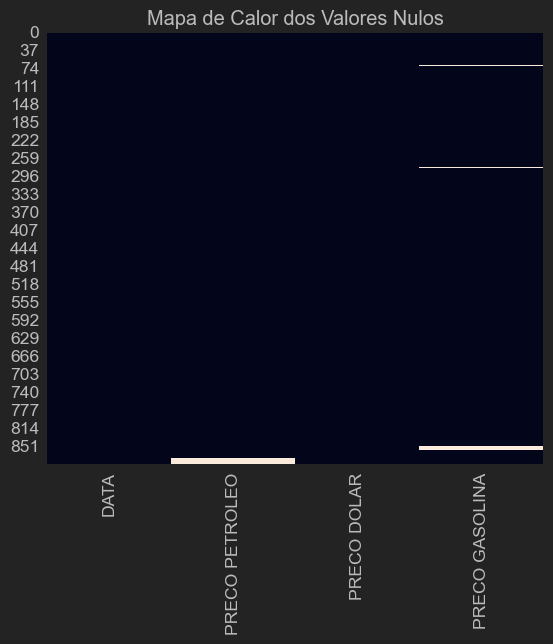

In [226]:
sns.heatmap(df_final.reset_index().isnull(), cbar=False)
plt.title('Mapa de Calor dos Valores Nulos')
plt.show()

In [227]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 886 entries, 2004-05-09 to 2021-04-25
Freq: W-SUN
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRECO PETROLEO  874 non-null    float64
 1   PRECO DOLAR     886 non-null    float64
 2   PRECO GASOLINA  873 non-null    float64
dtypes: float64(3)
memory usage: 27.7 KB


In [228]:
df_final[df_final['PRECO GASOLINA'].isnull()]

,PRECO PETROLEO,PRECO DOLAR,PRECO GASOLINA
DATA,,,
2005-08-14,64.456,2.260725,NaN
2005-08-21,64.230,2.364910,NaN
2009-08-16,72.898,1.789338,NaN
2009-08-23,71.516,1.850630,NaN
2015-08-16,47.944,3.655425,NaN
2020-08-23,44.792,5.525760,NaN
2020-08-30,45.258,5.555680,NaN
2020-09-06,43.060,4.849340,NaN
2020-09-13,39.450,5.331040,NaN


Há alguns valores faltando na base inicial dos combustíveis, vou preencher com o valor mais próximo 

In [229]:
df_final['PRECO GASOLINA'] = df_final['PRECO GASOLINA'].interpolate(method='nearest')
df_final

,PRECO PETROLEO,PRECO DOLAR,PRECO GASOLINA
DATA,,,
2004-05-09,37.250,3.060650,1.966
2004-05-16,37.618,2.968437,1.961
2004-05-23,38.430,3.150200,1.963
2004-05-30,37.952,3.146900,1.993
2004-06-06,37.254,2.986875,2.001
...,...,...,...
2021-03-28,NaN,5.589230,5.227
2021-04-04,NaN,5.576817,5.161
2021-04-11,NaN,5.346570,5.176


In [230]:
df_final = df_final.reset_index()
df_final = df_final[df_final['DATA']<='2020-12-31']
df_final.info()
df_final

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 868
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATA            869 non-null    datetime64[ns]
 1   PRECO PETROLEO  869 non-null    float64       
 2   PRECO DOLAR     869 non-null    float64       
 3   PRECO GASOLINA  869 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 33.9 KB


,DATA,PRECO PETROLEO,PRECO DOLAR,PRECO GASOLINA
0,2004-05-09,37.250,3.060650,1.966
1,2004-05-16,37.618,2.968437,1.961
2,2004-05-23,38.430,3.150200,1.963
3,2004-05-30,37.952,3.146900,1.993
4,2004-06-06,37.254,2.986875,2.001
...,...,...,...,...
864,2020-11-29,46.426,5.365750,4.199
865,2020-12-06,47.828,5.085280,4.210
866,2020-12-13,49.324,5.463433,4.186
867,2020-12-20,51.048,5.085810,4.195


In [231]:
df_final.to_csv('../data/data-regressao.csv',sep=';', index=False)